

---
# MNIST Dataset Classification Task
## Charis Filis Academic-Id: 9449


### Import dependecies 

In [1]:
pip install -q -U keras-tuner


     |████████████████████████████████| 135 kB 9.0 MB/s 
     |████████████████████████████████| 1.6 MB 12.5 MB/s 


In [34]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,Model
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras import regularizers
from tensorflow.keras import initializers
from keras.utils import np_utils
import keras_tuner as kt
import sympy
import numpy as np
import seaborn as sns
import collections
import time
# visualization tools
%matplotlib inline
import matplotlib.pyplot as plt

### Data Preprocessing

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0
n_classes = 10;
n_features = 784; # features are the pixels of each image
print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))
print("Training data shape:",x_train.shape)
print("Training y train shape", y_train.shape)
print("Testing data shape:",x_test.shape)
x_train, x_test = x_train.reshape([-1, n_features]), x_test.reshape([-1, n_features])

#Normalize to [0,1]
x_train, x_test = x_train/255, x_test/255
#One-hot encoding (to increase performance) - Encode Categorigal Data to one and zero
y_train, y_test = tf.one_hot(y_train, n_classes), tf.one_hot(y_test, n_classes)
# Flatten Dataset to vector in order to have proper input
# Training parameters.
learning_rate = 0.1
training_steps = 2000
batch_size = 256
display_step = 100
# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

Number of original training examples: 60000
Number of original test examples: 10000
Training data shape: (60000, 28, 28, 1)
Training y train shape (60000,)
Testing data shape: (10000, 28, 28, 1)


In [19]:
def model_builder():
    # Set Layers
    model_default = keras.Sequential()
    # # Input Layer
    model_default.add(layers.Flatten(input_shape=(n_features,)))
    # 1st hidden Layer
    model_default.add(layers.Dense(n_hidden_1,input_shape=(n_features,), activation='relu'))
    # 2nd hidden Layer
    model_default.add(layers.Dense(n_hidden_2,activation='relu'))
    # Output Layer
    model_default.add(layers.Dense((10),activation='softmax'))
    model_default.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
    return model_default

## Case 1 online Training --- Batch_size = 1

In [7]:
model_default=model_builder()
model_default.summary()
start = time.time()
history = model_default.fit(x_train,y_train, epochs=100, batch_size=1, validation_split=0.2, verbose=1)
end = time.time()
print("Training time: {}s".format(end-start))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


48000/48000 [==============================] - 131s 3ms/step - loss: 0.6327 - accuracy: 0.8216 - val_loss: 0.4604 - val_accuracy: 0.9039
Epoch 2/100
48000/48000 [==============================] - 132s 3ms/step - loss: 0.4856 - accuracy: 0.9040 - val_loss: 0.4532 - val_accuracy: 0.9176
Epoch 3/100
48000/48000 [==============================] - 151s 3ms/step - loss: 0.4939 - accuracy: 0.9156 - val_loss: 0.4381 - val_accuracy: 0.9273
Epoch 4/100
48000/48000 [==============================] - 131s 3ms/step - loss: 0.5024 - accuracy: 0.9223 - val_loss: 0.4629 - val_accuracy: 0.9303
Epoch 5/100
48000/48000 [==============================] - 124s 3ms/step - loss: 0.5016 - accuracy: 0.9280 - val_loss: 0.4201 - val_accuracy: 0.9363
Epoch 6/100
48000/48000 [==============================] - 131s 3ms/step - loss: 0.4909 - accuracy: 0.9344 - val_loss: 0.5852 - val_accuracy: 0.9192
Epoch 7/100
48000/48000 [==============================] - 120s 3ms/step - loss: 0.4807 - accuracy: 0.9375 - val_loss:

###### Plot Results

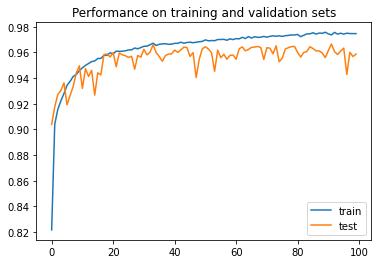

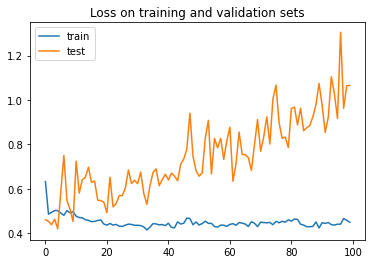

In [8]:
plt.figure(1)
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Performance on training and validation sets')
plt.show()
plt.figure(2)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

#### Case 2 - Minibatch Training with backpropagating grads


In [20]:
start = time.time()
history = model_default.fit(x_train,y_train, epochs=100, batch_size=256, validation_split=0.2, verbose=1)
end = time.time()
print("Training time: {}s".format(end-start))

Epoch 1/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0242 - accuracy: 0.9946 - val_loss: 0.2566 - val_accuracy: 0.9695
Epoch 2/100
188/188 [==============================] - 1s 3ms/step - loss: 0.0241 - accuracy: 0.9948 - val_loss: 0.3043 - val_accuracy: 0.9653
Epoch 3/100
188/188 [==============================] - 1s 3ms/step - loss: 0.0242 - accuracy: 0.9946 - val_loss: 0.2546 - val_accuracy: 0.9706
Epoch 4/100
188/188 [==============================] - 1s 3ms/step - loss: 0.0236 - accuracy: 0.9949 - val_loss: 0.2852 - val_accuracy: 0.9683
Epoch 5/100
188/188 [==============================] - 1s 3ms/step - loss: 0.0228 - accuracy: 0.9944 - val_loss: 0.2788 - val_accuracy: 0.9692
Epoch 6/100
188/188 [==============================] - 1s 3ms/step - loss: 0.0233 - accuracy: 0.9948 - val_loss: 0.2609 - val_accuracy: 0.9697
Epoch 7/100
188/188 [==============================] - 1s 3ms/step - loss: 0.0223 - accuracy: 0.9947 - val_loss: 0.2755 - val_accuracy: 0.9707

Plot Results

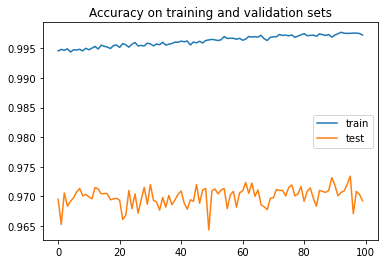

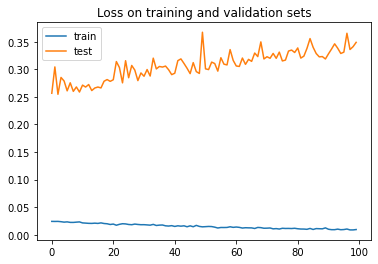

In [21]:
plt.figure(3)
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()
plt.figure(4)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

### Case 3 Batch Learning Batch_Size = Training Size

In [22]:
model_3=model_builder()
model_3.summary()
tic = time.time()
Ntrain = (int)(0.8*x_train.shape[1])
history = model_3.fit(x_train,y_train, epochs=100, batch_size=Ntrain, validation_split=0.2, verbose=1)
toc = time.time()
print("Training time: {}s".format(toc-tic))

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 128)               100480    
                                                                 
 dense_10 (Dense)            (None, 256)               33024     
                                                                 
 dense_11 (Dense)            (None, 10)                2570      
                                                                 
Total params: 136,074
Trainable params: 136,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
77/77 [==============================] - 1s 7ms/step - loss: 2.0401 - accuracy: 0.3830 - val_loss: 1.6148 - val_accuracy: 0.5348
Epoch 2/100
77/77 [====================

Plot Results

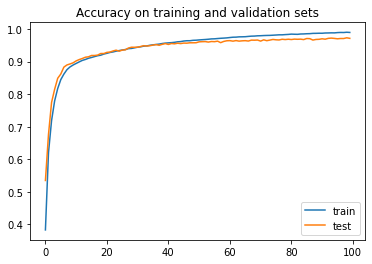

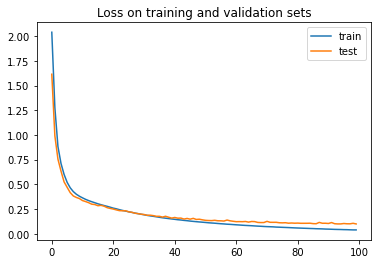

In [23]:
plt.figure(5)
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()
plt.figure(6)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

### Case 4 RMSProp optimizer with ρ = 0.01

Epoch 1/100
188/188 [==============================] - 1s 4ms/step - loss: 0.0042 - accuracy: 0.9986 - val_loss: 0.4462 - val_accuracy: 0.9690
Epoch 2/100
188/188 [==============================] - 1s 3ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.4229 - val_accuracy: 0.9700
Epoch 3/100
188/188 [==============================] - 1s 3ms/step - loss: 0.0034 - accuracy: 0.9989 - val_loss: 0.4138 - val_accuracy: 0.9718
Epoch 4/100
188/188 [==============================] - 1s 3ms/step - loss: 0.0035 - accuracy: 0.9990 - val_loss: 0.4593 - val_accuracy: 0.9688
Epoch 5/100
188/188 [==============================] - 1s 3ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 0.4327 - val_accuracy: 0.9693
Epoch 6/100
188/188 [==============================] - 1s 3ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 0.4036 - val_accuracy: 0.9714
Epoch 7/100
188/188 [==============================] - 1s 3ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.4167 - val_accuracy: 0.9703

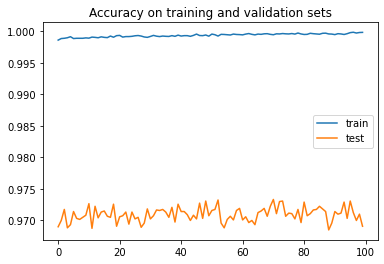

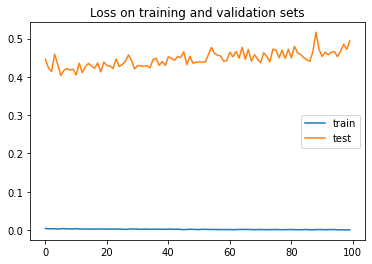

In [25]:
model_default.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001,rho=0.01),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
tic = time.time()

history = model_default.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.2, verbose=1)
toc = time.time()
print("Training tim: {}s".format(toc-tic))
plt.figure(7)
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()
plt.figure(8)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()

### Case 4 SDG optimizer and initializer of initial weights with normal distribution of mean 10 

In [35]:
# Create TF Model.
class NeuralNet4(Model):
# Set layers.
    def __init__(self):
        super(NeuralNet, self).__init__()
        # First fully-connected hidden layer.
        self.fc1 = layers.Dense(n_hidden_1, activation=tf.nn.relu)
        # First fully-connected hidden layer.
        self.fc2 = layers.Dense(n_hidden_2, activation=tf.nn.relu)
        # Second fully-connecter hidden layer.
        self.out = layers.Dense(num_classes)
        # Set forward pass.
    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        if not is_training:
        # tf cross entropy expect logits without softmax, so only
        # apply softmax when not training.
            x = tf.nn.softmax(x)
        return x
        # Build neural network model.
        neural_net = NeuralNet()

In [40]:
#Cross-Entropy Loss.
# Note that this will apply 'softmax' to the logits.
def cross_entropy_loss(x, y):
    # Convert labels to int 64 for tf cross-entropy function.
    y = tf.cast(y, tf.int64)
    # Apply softmax to logits and compute cross-entropy.
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y,
    logits=x)
    # Average loss across the batch.
    return tf.reduce_mean(loss)
    # Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32),
    axis=-1)
    # Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [41]:
# Optimization process.
def run_optimization(x, y):
# Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
# Forward pass.
        pred = neural_net(x, is_training=True)
# Compute loss.
        loss = cross_entropy_loss(pred, y)
# Variables to update, i.e. trainable variables.
    trainable_variables = neural_net.trainable_variables
# Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
# Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

Epoch 1/100
188/188 [==============================] - 1s 5ms/step - loss: 2.3026 - accuracy: 0.1140 - val_loss: 2.3026 - val_accuracy: 0.1060
Epoch 2/100
188/188 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1140 - val_loss: 2.3026 - val_accuracy: 0.1060
Epoch 3/100
188/188 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1140 - val_loss: 2.3026 - val_accuracy: 0.1060
Epoch 4/100
188/188 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1140 - val_loss: 2.3026 - val_accuracy: 0.1060
Epoch 5/100
188/188 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1140 - val_loss: 2.3026 - val_accuracy: 0.1060
Epoch 6/100
188/188 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1140 - val_loss: 2.3026 - val_accuracy: 0.1060
Epoch 7/100
188/188 [==============================] - 1s 3ms/step - loss: 2.3026 - accuracy: 0.1140 - val_loss: 2.3026 - val_accuracy: 0.1060

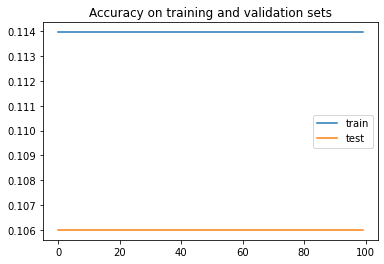

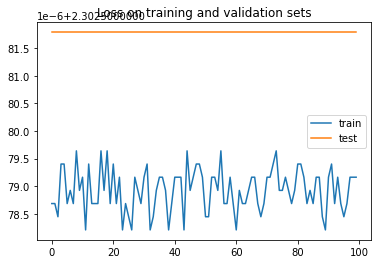

In [46]:
# model 4 
model_4 = keras.Sequential()
# 1st hidden layer
model_4.add(layers.Dense(n_hidden_1,input_shape=(n_features,),activation='relu',
                         kernel_initializer = initializers.RandomNormal(mean=10)))
# 2nd hidden layer
model_4.add(layers.Dense(n_hidden_2,activation='relu',
                         kernel_initializer=initializers.RandomNormal(mean=10)))
# Output layer
model_4.add(layers.Dense(10,kernel_initializer=initializers.RandomNormal(mean=10)))
# Compile model with correct optimizer
model_4.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001,momentum=0.0),loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
tic = time.time()

history = model_4.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.2, verbose=1)
toc = time.time()
print("Training tim: {}s".format(toc-tic))
plt.figure(9)
plt.plot(history.history['accuracy'], label = 'train')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.legend()
plt.title('Accuracy on training and validation sets')
plt.show()
plt.figure(10)
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.title('Loss on training and validation sets')
plt.show()
